In [41]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate

import sys
sys.path.append('../')
import RandomMatrix as RM

%matplotlib inline
sns.set()

np.random.seed(140)

Odlyzko Method: http://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/odlyzko92.pdf

In [38]:
trials = 100
Δs = []
N = 200
for _ in range(trials):
    A = RM.Generate_GUE(N) 
    λs, V = np.linalg.eigh(A)
    eig_spaces = [(λs[i+1] - λs[i])*(np.sqrt(4*N-λs[i]**2)/(2*np.pi)) for i in range(N-1)]
    Δs.extend(eig_spaces)
Δs = np.array(Δs)
Δs = Δs[~np.isnan(Δs)]

<ipython-input-38-d521881636d7>:7: RuntimeWarning: invalid value encountered in sqrt
  eig_spaces = [(λs[i+1] - λs[i])*(np.sqrt(4*N-λs[i]**2)/(2*np.pi)) for i in range(N-1)]


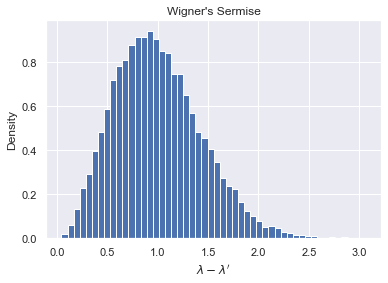

In [39]:
plt.ylabel("Density")
plt.xlabel("$\lambda - \lambda'$")
plt.title("Wigner's Sermise")
plt.hist(Δs, bins=50, density=True);

In [40]:
np.mean(Δs)

0.9995505020100586

Princeton Method

In [79]:
def sigma(x):
    return 2/np.pi * np.sqrt(1-x**2)

def normalize_eig(λ, N):
    return N * integrate.quad(lambda x: sigma(x), -1, λ/sqrt(N))[0]

In [80]:
trials = 100
Δs = []
N = 200
for _ in range(trials):
    A = RM.Generate_GUE(N) 
    λs, V = np.linalg.eigh(A)
    λs_normed = [normalize_eig(λ, N) for λ in λs]
    eig_spaces = [(λs_normed[i+1] - λs_normed[i])  for i in range(N-1)]
    Δs.extend(eig_spaces)

<ipython-input-79-d2c5c7582d66>:2: RuntimeWarning: invalid value encountered in sqrt
  return 2/np.pi * np.sqrt(1-x**2)
<ipython-input-79-d2c5c7582d66>:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return N * integrate.quad(lambda x: sigma(x), -1, λ/sqrt(N))[0]
<ipython-input-79-d2c5c7582d66>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return N * integrate.quad(lambda x: sigma(x), -1, λ/sqrt(N))[0]


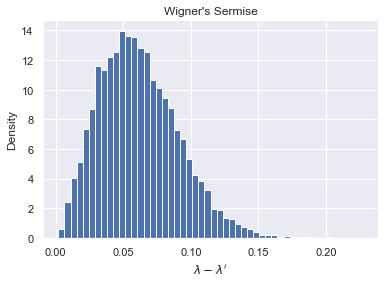

In [67]:
plt.ylabel("Density")
plt.xlabel("$\lambda - \lambda'$")
plt.title("Wigner's Sermise")
plt.hist(Δs, bins=50, density=True);

In [72]:
Δs = np.array(Δs)
Δs = Δs[~np.isnan(Δs)]
np.mean(Δs)

0.061386470582262466

In [81]:
Δs

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.46509858326632086,
 0.5896345039780304,
 1.2592945978834176,
 0.3299743967191655,
 0.41837453723141405,
 1.0394924600083857,
 1.2405243560844585,
 0.8895367367247644,
 0.27399815152602525,
 2.315519151407025,
 1.6430670291548548,
 2.1352355987552976,
 0.4897158792674414,
 1.1767879344340226,
 0.668762790745653,
 1.5878266042277183,
 1.1020364885193494,
 2.351218330449406,
 1.873079384272998,
 1.2970270692686263,
 1.9407399180756464,
 2.158572376715707,
 1.7909185442979911,
 1.2432828979119535,
 1.3554735284431025,
 2.666991679886756,
 1.4833287675670874,
 0.7064539416468847,
 2.1517896200697777,
 1.9747447658729556,
 0.9157842490968449,
 1.4053181984810692,
 2.574131475914726,
 1.2265049437883135,
 1.992011933731682,
 3.5138283723463886,
 0.659417213762